In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import statistics as stats

In [7]:
file = pd.read_csv('C:/Users/Beta/Desktop/query.csv')

In [8]:
print(file.to_string())

                         time   latitude   longitude    depth   mag magType    nst         gap      dmin   rms  net            id                   updated                                              place        type  horizontalError  depthError  magError  magNst    status locationSource magSource
0    2024-01-01T07:18:42.037Z  37.195900  136.869700   10.000  6.20      mb   94.0   33.000000   1.25100  0.85   us    us6000m0xm  2024-01-02T23:45:53.771Z                         4 km SSW of Anamizu, Japan  earthquake             3.53       1.800  0.025000   631.0  reviewed             us        us
1    2023-12-30T17:16:24.908Z  -2.962600  139.353200   39.102  6.30     mww  101.0   25.000000   1.42000  0.95   us    us6000m0n6  2023-12-31T17:23:18.043Z                   147 km WSW of Abepura, Indonesia  earthquake             6.94       5.382  0.057000    30.0  reviewed             us        us
2    2023-12-30T17:16:23.000Z  -3.205000  139.289000   10.000  6.50      Mi   18.0   86.399993   

In [9]:
duplicate = file.duplicated().sum()
print(duplicate)

1


In [10]:
duplicate = file.drop_duplicates(inplace = True)

In [11]:
duplicate = file.duplicated().sum()
print(duplicate)

0


In [12]:
nullvalue = file.isnull().sum()
print(nullvalue)
# datay nulli har columnek

time                 2
latitude             1
longitude            1
depth                2
mag                  1
magType              2
nst                196
gap                  3
dmin                 6
rms                  2
net                  1
id                   2
updated              1
place               22
type                 2
horizontalError      4
depthError           2
magError             7
magNst               4
status               2
locationSource       1
magSource            1
dtype: int64


In [13]:
file.fillna("0" , inplace=True)
nullvalue = file.isnull().sum()
print(nullvalue)

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64


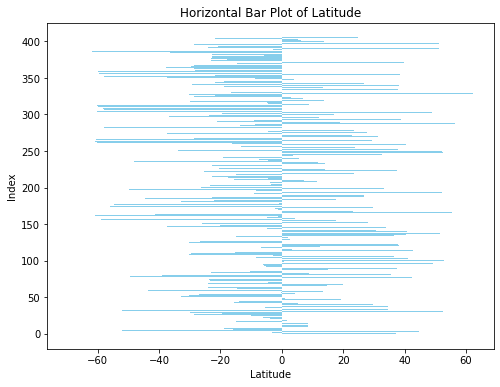

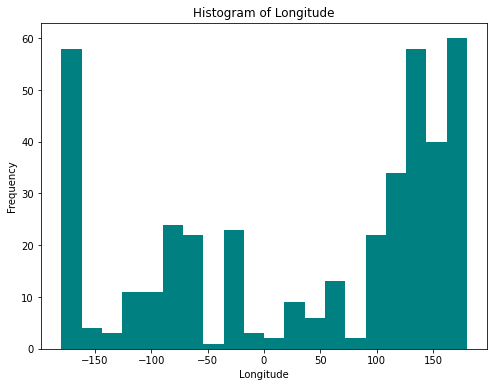

In [14]:
columns_to_convert = ['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']

# Convert selected columns to numeric type
file[columns_to_convert] = file[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Create a horizontal bar plot for 'latitude'
plt.figure(figsize=(8, 6))
plt.barh(y=file.index, width=file['latitude'], color='skyblue')
plt.xlabel('Latitude')
plt.ylabel('Index')
plt.title('Horizontal Bar Plot of Latitude')
plt.show()

# Create a histogram for 'longitude'
plt.figure(figsize=(8, 6))
plt.hist(file['longitude'], bins=20, color='teal')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Histogram of Longitude')
plt.show()

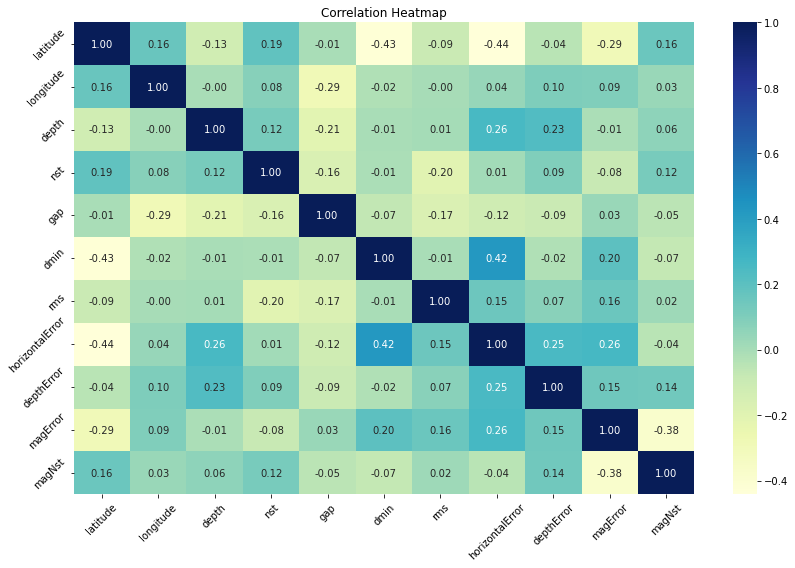

In [15]:
columns_to_convert = ['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']

# Convert selected columns to numeric type
file[columns_to_convert] = file[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Select numeric columns
numeric_columns = file.select_dtypes(include=[np.number])

# Check if there are numeric columns
if not numeric_columns.empty:
    # Calculate correlation matrix
    corr = numeric_columns.corr()
    
    # Create a heatmap to visualize the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")  # Change cmap to 'YlGnBu' for green-blue color palette
    plt.title('Correlation Heatmap')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.yticks(rotation=45)  # Rotate y-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()
else:
    print("No numeric columns found after conversion.")

In [16]:
print(file['time'].unique())

# Convert 'time' column to datetime format, handling errors
file['time'] = pd.to_datetime(file['time'], errors='coerce')

# Drop rows with NaT (invalid dates)
file.dropna(subset=['time'], inplace=True)

# Convert 'time' column to datetime format
file['time'] = pd.to_datetime(file['time'])

# Extract year from 'time' column
file['year'] = file['time'].dt.year

# Count the number of earthquakes in each year
earthquakes_per_year = file['year'].value_counts().sort_index()

# Print the number of earthquakes for each year
print("Number of earthquakes per year:")
for year, count in earthquakes_per_year.items():
    print(f"In {year}, the number of earthquakes is {count}.")

['2024-01-01T07:18:42.037Z' '2023-12-30T17:16:24.908Z'
 '2023-12-30T17:16:23.000Z' '2023-12-28T09:15:15.393Z'
 '2023-12-22T17:36:32.043Z' '2023-12-21T14:55:58.269Z'
 '2023-12-20T12:11:21.833Z' '0' '2023-12-03T19:49:36.868Z'
 '2023-12-03T14:35:58.768Z' '2023-12-03T10:35:51.878Z'
 '2023-12-02T20:52:15.877Z' '2023-12-02T18:09:26.307Z'
 '2023-12-02T17:40:16.653Z' '2023-12-02T16:03:37.952Z'
 '2023-11-24T09:05:03.893Z' '2023-11-22T04:47:31.590Z'
 '2023-11-22T02:48:51.641Z' '2023-11-17T08:14:10.545Z'
 '2023-11-14T07:00:56.463Z' '2023-11-13T07:43:34.115Z'
 '2023-11-10T20:45:11.772Z' '2023-11-08T13:02:06.115Z'
 '2023-11-08T04:52:51.393Z' '2023-11-01T21:04:48.023Z'
 '2023-10-31T12:33:43.867Z' '2023-10-31T11:10:56.148Z'
 '2023-10-29T04:32:07.879Z' '2023-10-23T10:10:14.193Z'
 '2023-10-16T11:35:30.449Z' '2023-10-15T03:36:00.454Z'
 '2023-10-11T20:04:58.206Z' '2023-10-11T00:41:55.908Z'
 '2023-10-10T10:01:31.660Z' '2023-10-07T08:40:11.361Z'
 '2023-10-07T08:34:26.985Z' '2023-10-07T07:12:49.702Z'
 '2023

Unique values in the 'time' column:
<DatetimeArray>
['2024-01-01 07:18:42.037000+00:00', '2023-12-30 17:16:24.908000+00:00',
        '2023-12-30 17:16:23+00:00', '2023-12-28 09:15:15.393000+00:00',
 '2023-12-22 17:36:32.043000+00:00', '2023-12-21 14:55:58.269000+00:00',
 '2023-12-20 12:11:21.833000+00:00', '2023-12-03 19:49:36.868000+00:00',
 '2023-12-03 14:35:58.768000+00:00', '2023-12-03 10:35:51.878000+00:00',
 ...
 '2021-01-06 06:20:35.947000+00:00', '2021-01-03 12:38:48.915000+00:00',
 '2020-12-29 11:19:54.762000+00:00', '2020-12-27 21:39:14.770000+00:00',
 '2020-12-24 23:43:41.964000+00:00', '2020-12-23 18:11:47.762000+00:00',
 '2020-12-20 17:23:22.668000+00:00', '2020-12-15 23:21:57.807000+00:00',
 '2020-12-14 15:20:49.542000+00:00', '2020-12-10 13:19:58.682000+00:00']
Length: 404, dtype: datetime64[ns, UTC]


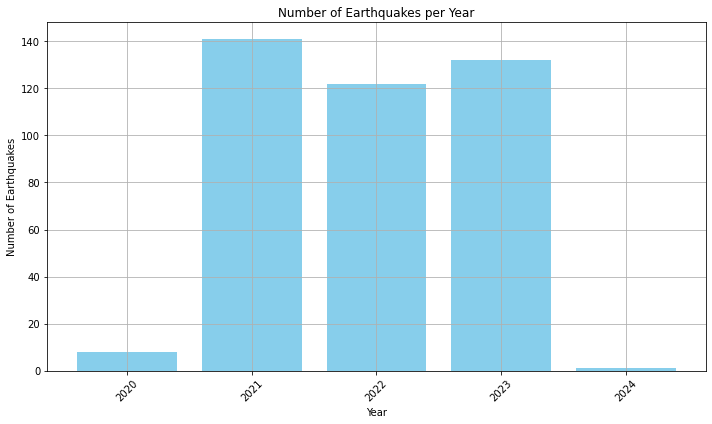

In [17]:
# Display unique values in the 'time' column
print("Unique values in the 'time' column:")
print(file['time'].unique())

# Convert 'time' column to datetime format, handling errors
file['time'] = pd.to_datetime(file['time'], errors='coerce')

# Drop rows with NaT (invalid dates)
file.dropna(subset=['time'], inplace=True)

# Convert 'time' column to datetime format
file['time'] = pd.to_datetime(file['time'])

# Extract year from 'time' column
file['year'] = file['time'].dt.year

# Count the number of earthquakes in each year
earthquakes_per_year = file['year'].value_counts().sort_index()

# Plot the number of earthquakes per year
plt.figure(figsize=(10, 6))
plt.bar(earthquakes_per_year.index, earthquakes_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes per Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
print("Unique values in the 'time' column:")
print(file['time'].unique())

# Convert 'time' column to datetime format, handling errors
file['time'] = pd.to_datetime(file['time'], errors='coerce')

# Drop rows with NaT (invalid dates)
file.dropna(subset=['time'], inplace=True)

# Convert 'time' column to datetime format
file['time'] = pd.to_datetime(file['time'])

# Extract year and day from 'time' column
file['year'] = file['time'].dt.year
file['day'] = file['time'].dt.strftime('%d-%m-%Y')  # Format day as DD-MM-YYYY

# Group by year and day, count the number of earthquakes for each group
earthquakes_per_day = file.groupby(['year', 'day']).size().reset_index(name='num_earthquakes')

# Print the number of earthquakes and the corresponding day(s) for each year
print("\nNumber of earthquakes and corresponding day(s) for each year:")
for _, row in earthquakes_per_day.iterrows():
    print(f"In {row['day']}, there were {row['num_earthquakes']} earthquake(s) in {int(row['year'])}.")

Unique values in the 'time' column:
<DatetimeArray>
['2024-01-01 07:18:42.037000+00:00', '2023-12-30 17:16:24.908000+00:00',
        '2023-12-30 17:16:23+00:00', '2023-12-28 09:15:15.393000+00:00',
 '2023-12-22 17:36:32.043000+00:00', '2023-12-21 14:55:58.269000+00:00',
 '2023-12-20 12:11:21.833000+00:00', '2023-12-03 19:49:36.868000+00:00',
 '2023-12-03 14:35:58.768000+00:00', '2023-12-03 10:35:51.878000+00:00',
 ...
 '2021-01-06 06:20:35.947000+00:00', '2021-01-03 12:38:48.915000+00:00',
 '2020-12-29 11:19:54.762000+00:00', '2020-12-27 21:39:14.770000+00:00',
 '2020-12-24 23:43:41.964000+00:00', '2020-12-23 18:11:47.762000+00:00',
 '2020-12-20 17:23:22.668000+00:00', '2020-12-15 23:21:57.807000+00:00',
 '2020-12-14 15:20:49.542000+00:00', '2020-12-10 13:19:58.682000+00:00']
Length: 404, dtype: datetime64[ns, UTC]

Number of earthquakes and corresponding day(s) for each year:
In 10-12-2020, there were 1 earthquake(s) in 2020.
In 14-12-2020, there were 1 earthquake(s) in 2020.
In 15-12

Unique values in the 'time' column:
<DatetimeArray>
['2024-01-01 07:18:42.037000+00:00', '2023-12-30 17:16:24.908000+00:00',
        '2023-12-30 17:16:23+00:00', '2023-12-28 09:15:15.393000+00:00',
 '2023-12-22 17:36:32.043000+00:00', '2023-12-21 14:55:58.269000+00:00',
 '2023-12-20 12:11:21.833000+00:00', '2023-12-03 19:49:36.868000+00:00',
 '2023-12-03 14:35:58.768000+00:00', '2023-12-03 10:35:51.878000+00:00',
 ...
 '2021-01-06 06:20:35.947000+00:00', '2021-01-03 12:38:48.915000+00:00',
 '2020-12-29 11:19:54.762000+00:00', '2020-12-27 21:39:14.770000+00:00',
 '2020-12-24 23:43:41.964000+00:00', '2020-12-23 18:11:47.762000+00:00',
 '2020-12-20 17:23:22.668000+00:00', '2020-12-15 23:21:57.807000+00:00',
 '2020-12-14 15:20:49.542000+00:00', '2020-12-10 13:19:58.682000+00:00']
Length: 404, dtype: datetime64[ns, UTC]


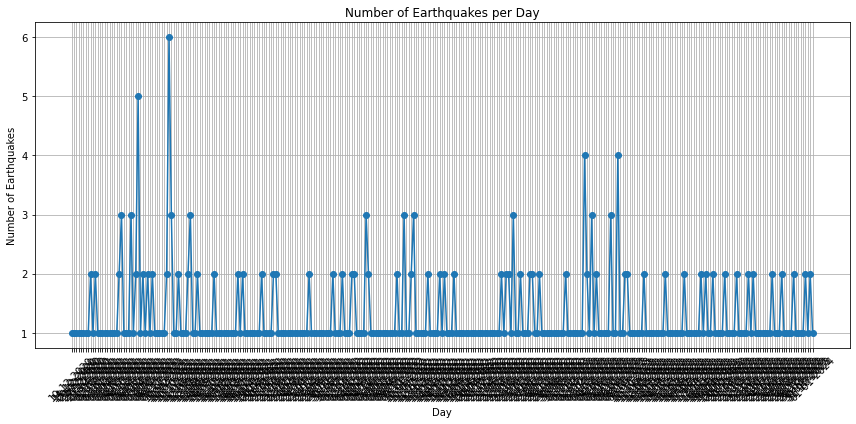

In [19]:
# Display unique values in the 'time' column
print("Unique values in the 'time' column:")
print(file['time'].unique())

# Convert 'time' column to datetime format, handling errors
file['time'] = pd.to_datetime(file['time'], errors='coerce')

# Drop rows with NaT (invalid dates)
file.dropna(subset=['time'], inplace=True)

# Convert 'time' column to datetime format
file['time'] = pd.to_datetime(file['time'])

# Extract year and day from 'time' column
file['year'] = file['time'].dt.year
file['day'] = file['time'].dt.strftime('%d-%m-%Y')  # Format day as DD-MM-YYYY

# Group by year and day, count the number of earthquakes for each group
earthquakes_per_day = file.groupby(['year', 'day']).size().reset_index(name='num_earthquakes')

# Plot the number of earthquakes per day
plt.figure(figsize=(12, 6))
plt.plot(earthquakes_per_day['day'], earthquakes_per_day['num_earthquakes'], marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

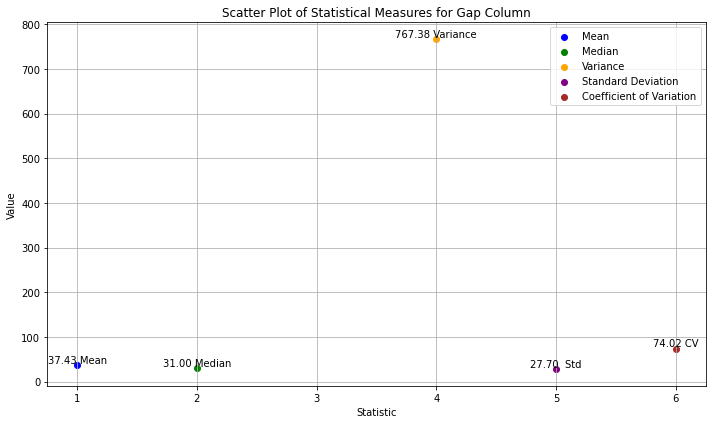

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'file' is your DataFrame containing the earthquake data
gap_column = file['gap']

# Calculate statistics
mean_gap = np.mean(gap_column)
median_gap = np.median(gap_column)
variance_gap = np.var(gap_column)
std_dev_gap = np.std(gap_column)
coeff_of_var_gap = (std_dev_gap / mean_gap) * 100

# Scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for mean
plt.scatter(1, mean_gap, label='Mean', color='blue')
plt.text(1, mean_gap, f'{mean_gap:.2f} Mean', ha='center', va='bottom')

# Scatter plot for median
plt.scatter(2, median_gap, label='Median', color='green')
plt.text(2, median_gap, f'{median_gap:.2f} Median', ha='center', va='bottom')

# Scatter plot for variance
plt.scatter(4, variance_gap, label='Variance', color='orange')
plt.text(4, variance_gap, f'{variance_gap:.2f} Variance', ha='center', va='bottom')

# Scatter plot for standard deviation
plt.scatter(5, std_dev_gap, label='Standard Deviation', color='purple')
plt.text(5, std_dev_gap, f'{std_dev_gap:.2f}  Std', ha='center', va='bottom')

# Scatter plot for coefficient of variation
plt.scatter(6, coeff_of_var_gap, label='Coefficient of Variation', color='brown')
plt.text(6, coeff_of_var_gap, f'{coeff_of_var_gap:.2f} CV', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.title('Scatter Plot of Statistical Measures for Gap Column')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
# Split the data into training and testing set
X = file.drop('mag', axis=1)
y = file['nst']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (323, 23)
X_test shape: (81, 23)
y_train shape: (323,)
y_test shape: (81,)


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'file' is your DataFrame containing earthquake data

# Extract features (X) and target variable (y)
X = file['mag'].values.reshape(-1, 1)  # Reshape to 2D array as required by scikit-learn
y = file['nst']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Once the model is trained, you can use it to make predictions
y_pred = model.predict(X_test)

# Optionally, you can evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 9567.827232386064


In [34]:
new_data = np.array([[5.0], [6.0], [7.0]])  # Example new data with 'mag' values

# Use the trained model to make predictions on the new data
predictions = model.predict(new_data)

# Print the predictions
print("Predictions:", predictions)

Predictions: [ 25.96055041  75.20964939 124.45874837]


In [29]:


# Specify the column to analyze (e.g., magnitude)
column_to_analyze = "mag"

# Define the range of values for the column (e.g., magnitude)
min_value = 5.0
max_value = 7.0

# Filter the data based on the specified range of values for the column
filtered_data = file[(file[column_to_analyze] >= min_value) & (file[column_to_analyze] <= max_value)]

# Calculate the likelihood of earthquakes within the specified range
likelihood = len(filtered_data) / len(file) * 100

# Print the likelihood of earthquakes within the specified range
print(f"The likelihood of earthquakes with magnitude between {min_value} and {max_value} is {likelihood:.2f}%")


The likelihood of earthquakes with magnitude between 5.0 and 7.0 is 100.00%


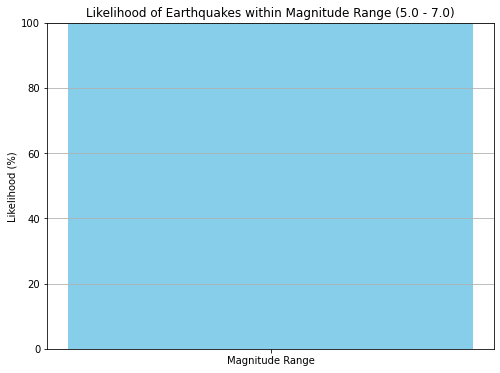

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'file' is your DataFrame containing earthquake data

# Specify the column to analyze (e.g., magnitude)
column_to_analyze = "mag"

# Define the range of values for the column (e.g., magnitude)
min_value = 5.0
max_value = 7.0

# Filter the data based on the specified range of values for the column
filtered_data = file[(file[column_to_analyze] >= min_value) & (file[column_to_analyze] <= max_value)]

# Calculate the likelihood of earthquakes within the specified range
likelihood = len(filtered_data) / len(file) * 100

# Plot the likelihood as a bar plot
plt.figure(figsize=(8, 6))
plt.bar(["Magnitude Range"], [likelihood], color='skyblue')
plt.title(f"Likelihood of Earthquakes within Magnitude Range ({min_value} - {max_value})")
plt.ylabel("Likelihood (%)")
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.grid(axis='y')
plt.show()
